In [1]:
! pip install selenium # use web driver to load JavaScript

In [2]:
## Import what you'll need here
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

In [3]:
import os
os.environ['MOZ_HEADLESS'] = '1' # prevents browser from popping up
dr = webdriver.Firefox()

In [4]:
dr.get("https://www.opensecrets.org/federal-lobbying/clients/summary?id=D000000115")
soup = BeautifulSoup(dr.page_source,
 'html.parser')

In [5]:
result = soup.find_all('div')
for n in range(0, 100):
    if "\nAnnual Lobbying by Microsoft Corp\n\n\n\n\n\n" in result[n].text:
        print(n)

36
50
51
52
53
54
60


In [6]:
result[36].find_all('div', attrs = {'class' : "FusionChart"})[0]['data-source']

'{"chart":{"xaxisname":"Year","yaxisname":"Total Lobbying Spending","syaxisname":"Number of Lobbyists","numberprefix":"$","setadaptivesymin":"1","bgColor":"#ffffff","showBorder":"0","showCanvasBorder":"0","showAlternateHgridColor":"0","usePlotGradientcolor":"0","showvalues":0,"formatnumberscale":1,"divlinedashed":1,"showplotborder":0,"legendBorderColor":"ffffff","legendShadow":0,"numberScaleValue":"1000,1000,1000","numberScaleUnit":"K,M,B","basefont":"Arial","labelDisplay":"rotate","exportEnabled":"1"},"categories":[{"category":[{"label":"1998"},{"label":"1999"},{"label":"2000"},{"label":"2001"},{"label":"2002"},{"label":"2003"},{"label":"2004"},{"label":"2005"},{"label":"2006"},{"label":"2007"},{"label":"2008"},{"label":"2009"},{"label":"2010"},{"label":"2011"},{"label":"2012"},{"label":"2013"},{"label":"2014"},{"label":"2015"},{"label":"2016"},{"label":"2017"},{"label":"2018"},{"label":"2019"},{"label":"2020"},{"label":"2021"},{"label":"2022"},{"label":"2023"}]}],"dataset":[{"dataset

In [7]:
data = result[36].find_all('div', attrs = {'class' : "FusionChart"})[0]['data-source']

In [8]:
import ast
data = ast.literal_eval(data)

In [9]:
data['categories']

[{'category': [{'label': '1998'},
   {'label': '1999'},
   {'label': '2000'},
   {'label': '2001'},
   {'label': '2002'},
   {'label': '2003'},
   {'label': '2004'},
   {'label': '2005'},
   {'label': '2006'},
   {'label': '2007'},
   {'label': '2008'},
   {'label': '2009'},
   {'label': '2010'},
   {'label': '2011'},
   {'label': '2012'},
   {'label': '2013'},
   {'label': '2014'},
   {'label': '2015'},
   {'label': '2016'},
   {'label': '2017'},
   {'label': '2018'},
   {'label': '2019'},
   {'label': '2020'},
   {'label': '2021'},
   {'label': '2022'},
   {'label': '2023'}]}]

In [10]:
data['dataset'][0]['dataset'][2:]
print('Number of Categories: ', len(data['categories'][0]['category']))
print('Number of Datapoints: ', len(data['dataset'][0]['dataset'][3]['data']))

Number of Categories:  26
Number of Datapoints:  26


In [13]:
print(data['dataset'][0]['dataset'][1])

{'seriesname': 'Q1 Report', 'data': [{'value': '', 'tooltext': '1st Quarter: $'}, {'value': '', 'tooltext': '1st Quarter: $'}, {'value': '', 'tooltext': '1st Quarter: $'}, {'value': '', 'tooltext': '1st Quarter: $'}, {'value': '', 'tooltext': '1st Quarter: $'}, {'value': '', 'tooltext': '1st Quarter: $'}, {'value': '', 'tooltext': '1st Quarter: $'}, {'value': '', 'tooltext': '1st Quarter: $'}, {'value': '', 'tooltext': '1st Quarter: $'}, {'value': '', 'tooltext': '1st Quarter: $'}, {'value': 2560000, 'tooltext': '1st Quarter: $2,560,000'}, {'value': 1650000, 'tooltext': '1st Quarter: $1,650,000'}, {'value': 1720000, 'tooltext': '1st Quarter: $1,720,000'}, {'value': 1720000, 'tooltext': '1st Quarter: $1,720,000'}, {'value': 1790000, 'tooltext': '1st Quarter: $1,790,000'}, {'value': 2530000, 'tooltext': '1st Quarter: $2,530,000'}, {'value': 2080000, 'tooltext': '1st Quarter: $2,080,000'}, {'value': 1890000, 'tooltext': '1st Quarter: $1,890,000'}, {'value': 2020000, 'tooltext': '1st Quart

In [50]:
# goal: reproduce plots from the website
import matplotlib.pyplot as plt
import numpy as np

years = data['categories'][0]['category']
q_dict = {}
q_dict['q1'] = data['dataset'][0]['dataset'][2]['data']
q_dict['q2'] = data['dataset'][0]['dataset'][3]['data']
q_dict['q3'] = data['dataset'][0]['dataset'][4]['data']
q_dict['q4'] = data['dataset'][0]['dataset'][5]['data']
num_lobbyists = data['lineset'][0]['data']

In [51]:
q_dict['q1']

[{'value': '', 'tooltext': '1st Quarter: $'},
 {'value': '', 'tooltext': '1st Quarter: $'},
 {'value': '', 'tooltext': '1st Quarter: $'},
 {'value': '', 'tooltext': '1st Quarter: $'},
 {'value': '', 'tooltext': '1st Quarter: $'},
 {'value': '', 'tooltext': '1st Quarter: $'},
 {'value': '', 'tooltext': '1st Quarter: $'},
 {'value': '', 'tooltext': '1st Quarter: $'},
 {'value': '', 'tooltext': '1st Quarter: $'},
 {'value': '', 'tooltext': '1st Quarter: $'},
 {'value': 2560000, 'tooltext': '1st Quarter: $2,560,000'},
 {'value': 1650000, 'tooltext': '1st Quarter: $1,650,000'},
 {'value': 1720000, 'tooltext': '1st Quarter: $1,720,000'},
 {'value': 1720000, 'tooltext': '1st Quarter: $1,720,000'},
 {'value': 1790000, 'tooltext': '1st Quarter: $1,790,000'},
 {'value': 2530000, 'tooltext': '1st Quarter: $2,530,000'},
 {'value': 2080000, 'tooltext': '1st Quarter: $2,080,000'},
 {'value': 1890000, 'tooltext': '1st Quarter: $1,890,000'},
 {'value': 2020000, 'tooltext': '1st Quarter: $2,020,000'},


26
26
26
26
26
26
26
26


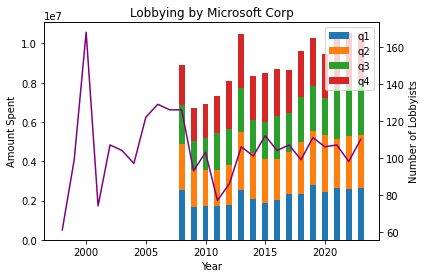

In [56]:
years_proc = [int(year['label']) for year in years]
quarterly_counts = {}
for key in ["q1", "q2", "q3", "q4"]:
    quarterly_counts[key] = []
    quarterly_counts[key] = [q_dict[key][idx]['value'] for idx in range(len(years_proc))]
    for idx in range(len(years_proc)):
        if quarterly_counts[key][idx] == '':
            quarterly_counts[key][idx] = 0
        else:
            continue
num_lobbyists_proc = [int(lobbyist['value']) for lobbyist in num_lobbyists]

# weight_counts = {
#     "q1": [q1_values['value'] for q1_values in q1_values],
#     "q2": [q2_values['value'] for q2_values in q2_values],
#     "q3": [q3_values['value'] for q3_values in q3_values],
#     "q4": [q4_values['value'] for q4_values in q4_values],
# }
width = 0.5

# two subplots
fig, ax = plt.subplots()
bottom = np.zeros(26)

for boolean, quarterly_count in quarterly_counts.items():
    print(len(quarterly_count))
    print(len(years_proc))
    p = ax.bar(years_proc, quarterly_count, width, label=boolean, bottom=bottom)
    bottom += quarterly_count

ax.set_title("Lobbying by Microsoft Corp")
ax.legend(loc="upper right")
ax.set_ylabel("Amount Spent")
ax.set_xlabel("Year")

ax2 = ax.twinx()
ax2.plot(years_proc, num_lobbyists_proc, color='purple')
ax2.set_ylabel("Number of Lobbyists")

plt.show()


In [77]:
## Code here
for n in range(len(result)):
    print(n, result[n].find_all('h2'))

0 [<h2 class="Donate-title f-strata-title c-navy" data-orphans='{"words":"2","wrap":"true"}'>
            We follow the money. <span class="f-short-underline">You</span> make it possible.
        </h2>]
1 [<h2 class="Donate-title f-strata-title c-navy" data-orphans='{"words":"2","wrap":"true"}'>
            We follow the money. <span class="f-short-underline">You</span> make it possible.
        </h2>]
2 [<h2 class="Donate-title f-strata-title c-navy" data-orphans='{"words":"2","wrap":"true"}'>
            We follow the money. <span class="f-short-underline">You</span> make it possible.
        </h2>]
3 []
4 []
5 []
6 [<h2 class="f-strata-title f-uppercase" style="color: white; fill: white; text-align: center; font-size: 260%;"> Can you give just $1?</h2>]
7 []
8 []
9 []
10 [<h2 class="f-strata-title f-uppercase" style="color: white; fill: white; text-align: center; font-size: 260%;"> Can you give just $1?</h2>]
11 [<h2 class="f-strata-title f-uppercase" style="color: white; fill: whit

In [51]:
sub_result = soup.find_all('div')


In [52]:
sub_result[0]

<div class="Donate-modal" id="donateModal">
<div class="Donate">
<div class="Donate-content">
<h2 class="Donate-title f-strata-title c-navy" data-orphans='{"words":"2","wrap":"true"}'>
            We follow the money. <span class="f-short-underline">You</span> make it possible.
        </h2>
</div>
<form accept-charset="UTF-8" action="https://action.opensecrets.org/a/donate" class="Donate-form" method="get">
<input name="utm_campaign" type="hidden" value="donate_side_red_button"/>
<input name="utm_medium" type="hidden" value="footer"/>
<input name="utm_source" type="hidden" value="/federal-lobbying/clients/summary"/>
<ul class="Donate-amounts u-clearfix u-mb2">
<li class="Donate-item">
<input checked="" class="Donate-input" id="footer-amount-35" name="amount-footer" type="radio" value="35"/>
<label class="Donate-label" for="footer-amount-35">$35</label>
</li>
<li class="Donate-item">
<input class="Donate-input" id="footer-amount-50" name="amount-footer" type="radio" value="50"/>
<label